<a href="https://colab.research.google.com/github/kalyankalluri999/Disseration/blob/main/Updated_Disseration_Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
kidney_dataset = pd.read_csv('Kidney_disease.csv')
kidney_dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [80]:
print("The kidney dataset has {} data points".format(kidney_dataset.shape[0]))
print("The kidney dataset has {} features".format(kidney_dataset.shape[1]))

The kidney dataset has 400 data points
The kidney dataset has 26 features


In [81]:
kidney_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [82]:
kidney_dataset.shape

(400, 26)

In [83]:
kidney_dataset.drop('id', axis = 1, inplace = True)

In [84]:
# rename column names to make it more user-friendly

kidney_dataset.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [85]:
kidney_dataset.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [86]:
kidney_dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [87]:
kidney_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [88]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# converting necessary columns to numerical type
kidney_dataset['packed_cell_volume'] = pd.to_numeric(kidney_dataset['packed_cell_volume'], errors='coerce')
kidney_dataset['white_blood_cell_count'] = pd.to_numeric(kidney_dataset['white_blood_cell_count'], errors='coerce')
kidney_dataset['red_blood_cell_count'] = pd.to_numeric(kidney_dataset['red_blood_cell_count'], errors='coerce')

In [89]:
kidney_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [90]:
kidney_dataset.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

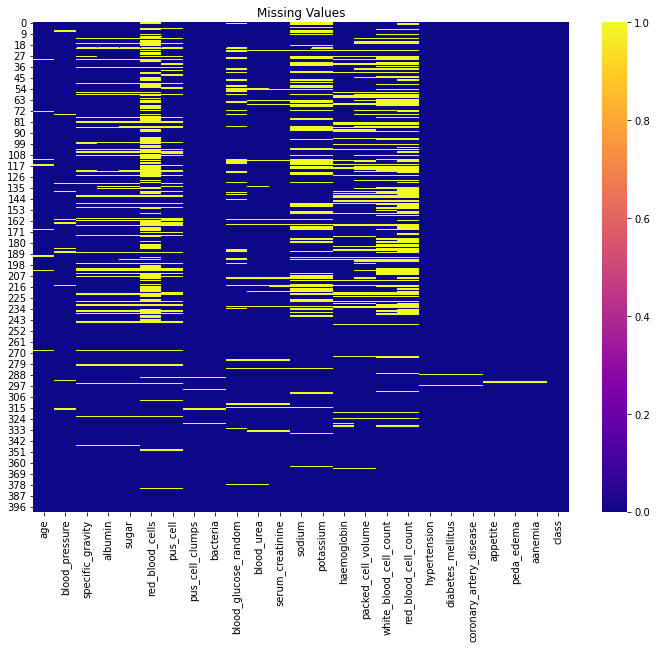

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) 
sns.heatmap(kidney_dataset.isna(), cmap='plasma')
plt.title("Missing Values") 
plt.show()

In [92]:
# Extracting categorical and numerical columns
cat_cols = [col for col in kidney_dataset.columns if kidney_dataset[col].dtype == 'object']
num_cols = [col for col in kidney_dataset.columns if kidney_dataset[col].dtype != 'object']

In [93]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {kidney_dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [94]:
#There is some ambugity present in the columns we have to remove that.
# replace incorrect values

kidney_dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
kidney_dataset['coronary_artery_disease'] = kidney_dataset['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
kidney_dataset['class'] = kidney_dataset['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [95]:
kidney_dataset['class'] = kidney_dataset['class'].map({'ckd': 0, 'not ckd': 1})
kidney_dataset['class'] = pd.to_numeric(kidney_dataset['class'], errors='coerce')

In [96]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {kidney_dataset[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

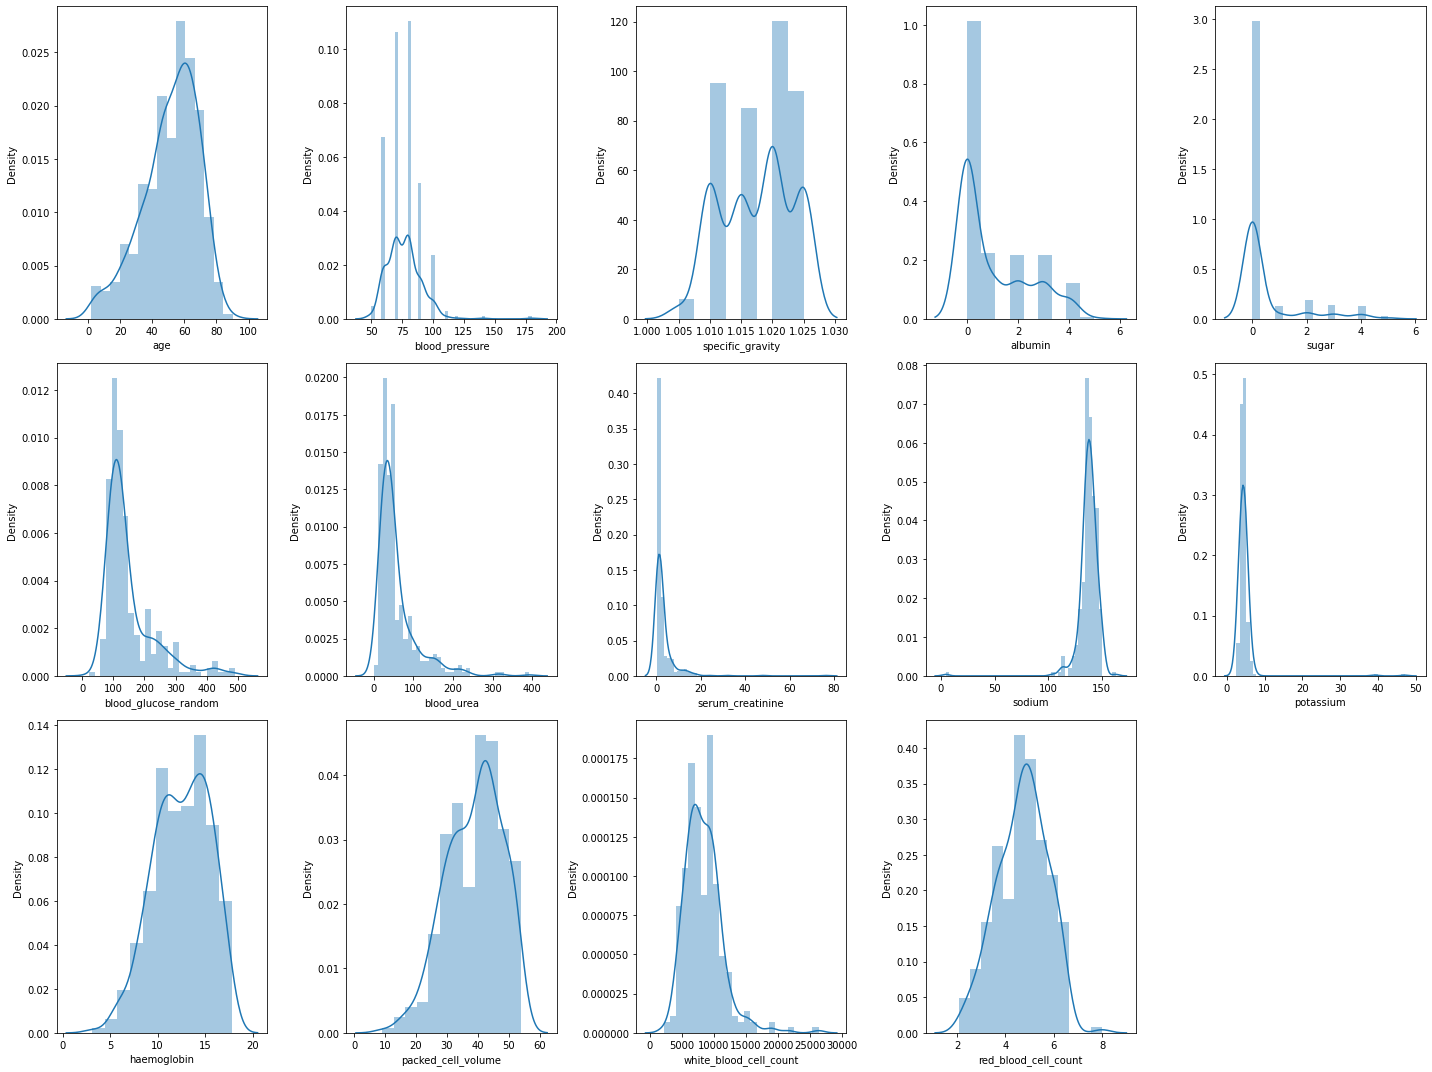

In [97]:
import seaborn as sns
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_dataset[column])
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

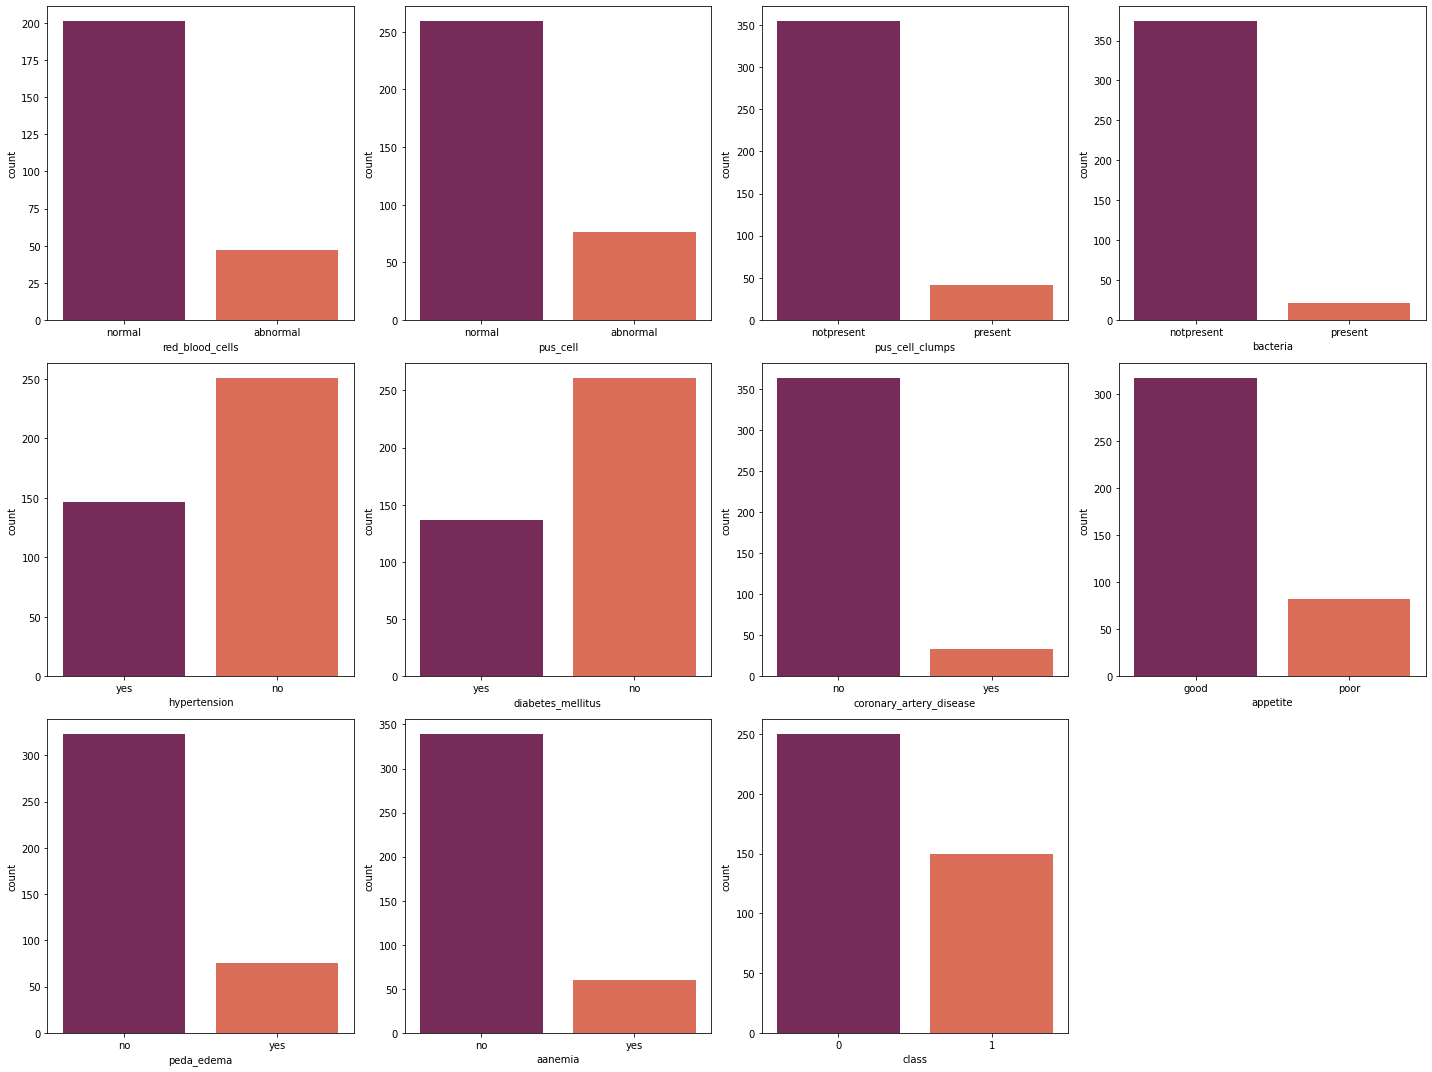

In [98]:
# looking at categorical columns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidney_dataset[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

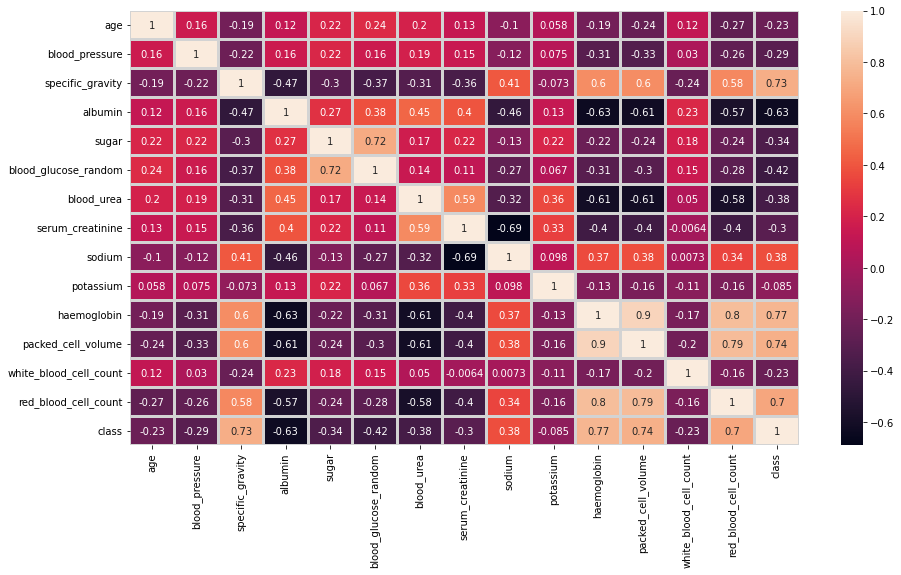

In [99]:
# heatmap of data
plt.figure(figsize = (15, 8))
sns.heatmap(kidney_dataset.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [100]:
kidney_dataset.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

**Exploratory Data Analysis**

In [101]:
# defining functions to create plot

def violin(col):
    fig = px.violin(kidney_dataset, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()
def kde(col):
    grid = sns.FacetGrid(kidney_dataset, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()  
def scatter(col1, col2):
    fig = px.scatter(kidney_dataset, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

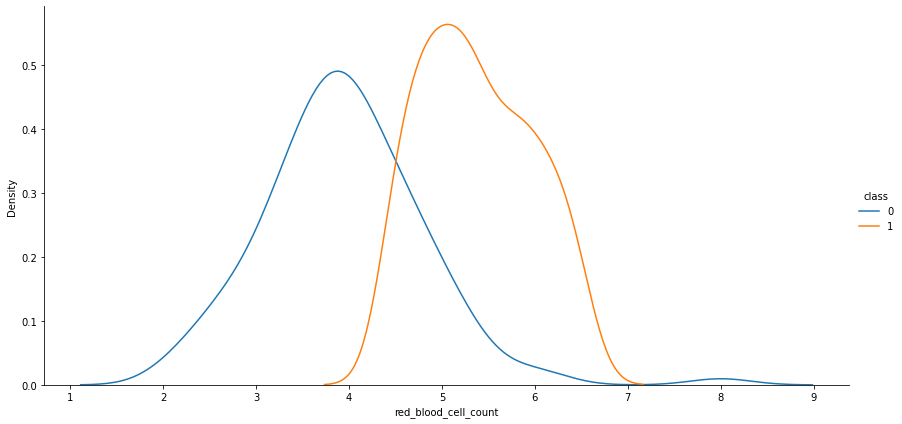

In [102]:
kde('red_blood_cell_count')

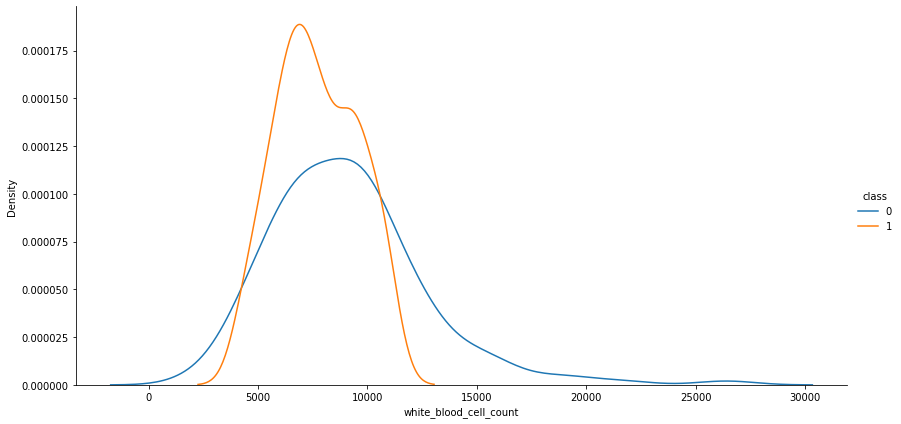

In [103]:
kde('white_blood_cell_count')

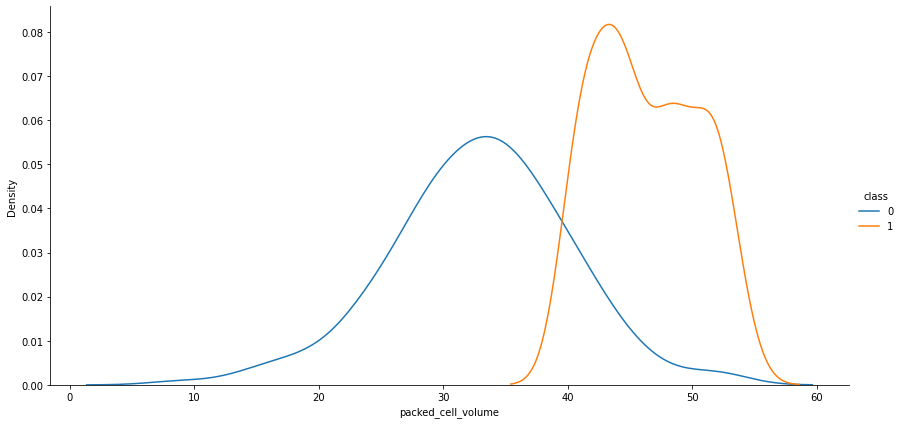

In [104]:
kde('packed_cell_volume')

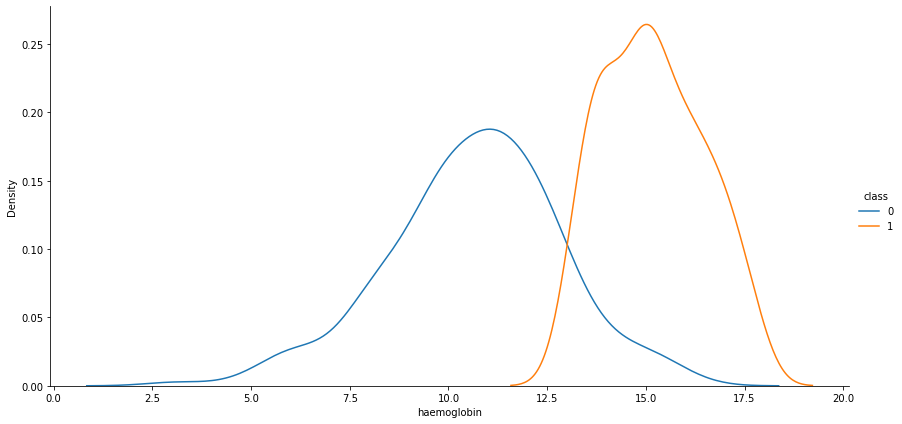

In [105]:
kde('haemoglobin')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


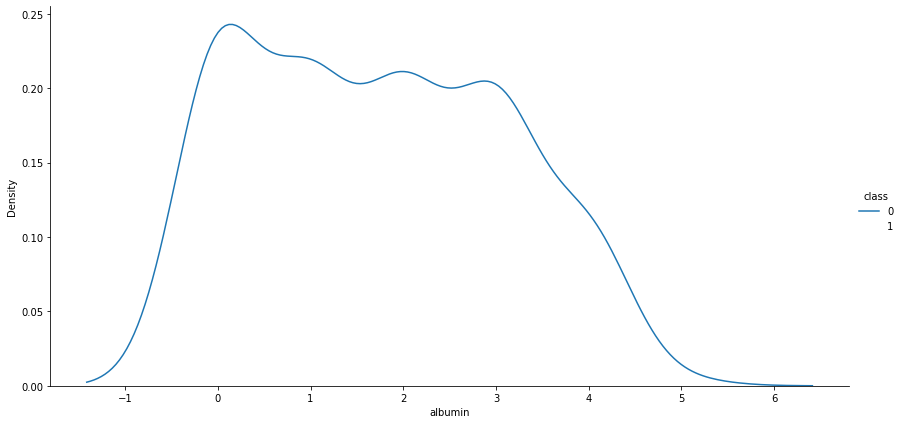

In [106]:
kde('albumin')

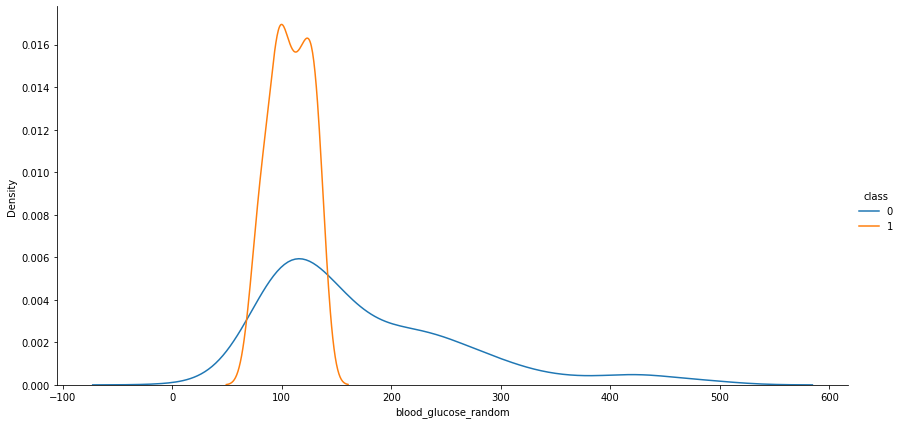

In [107]:
kde('blood_glucose_random')

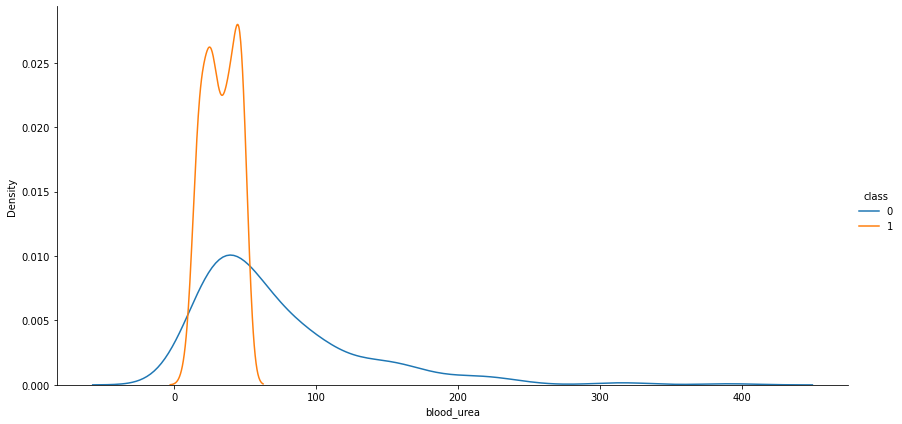

In [108]:
kde('blood_urea')

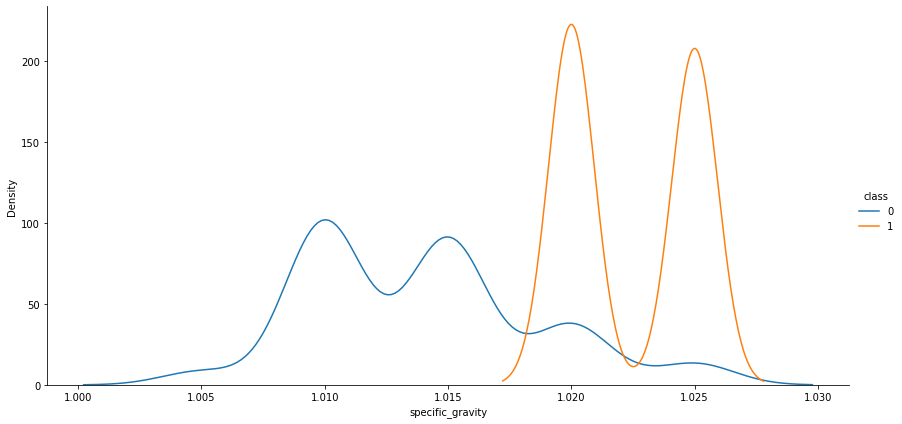

In [109]:
kde('specific_gravity')

**Data Pre Processing**

In [110]:
# checking for null values
kidney_dataset.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [111]:
kidney_dataset[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [112]:
kidney_dataset[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [113]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = kidney_dataset[feature].dropna().sample(kidney_dataset[feature].isna().sum())
    random_sample.index = kidney_dataset[kidney_dataset[feature].isnull()].index
    kidney_dataset.loc[kidney_dataset[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = kidney_dataset[feature].mode()[0]
    kidney_dataset[feature] = kidney_dataset[feature].fillna(mode)

In [114]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

In [115]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')
for col in cat_cols:
    impute_mode(col)

In [116]:
kidney_dataset[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

**All the missing values are handeled now, lets do ctaegorical features encoding now**

**Feature Encoding**

In [117]:
for col in cat_cols:
    print(f"{col} has {kidney_dataset[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [118]:
#As all of the categorical columns have 2 categories we can use label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    kidney_dataset[col] = le.fit_transform(kidney_dataset[col])

In [119]:
kidney_dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,124.0,...,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


**Model Building and Implementation**

In [120]:
ind_col = [col for col in kidney_dataset.columns if col != 'class']
dep_col = 'class'

In [121]:
X = kidney_dataset[ind_col]
y = kidney_dataset[dep_col]
# splitting data intp training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

**KNN Algorithm**

In [122]:
# Used Sklearn library imported KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Also imported perfomance metrics using sklearn library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

KNN_AL = KNeighborsClassifier()
KNN_AL.fit(X_train, y_train)

# imported accuracy score, confusion matrix and classification report using sklearn
KNN_ACCURACY = accuracy_score(y_test, KNN_AL.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, KNN_AL.predict(X_train))}")
print(f"Test Accuracy of KNN is {KNN_ACCURACY} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, KNN_AL.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, KNN_AL.predict(X_test))}")

Training Accuracy of KNN is 0.7785714285714286
Test Accuracy of KNN is 0.6583333333333333 

Confusion Matrix :- 
[[48 24]
 [17 31]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        72
           1       0.56      0.65      0.60        48

    accuracy                           0.66       120
   macro avg       0.65      0.66      0.65       120
weighted avg       0.67      0.66      0.66       120



**Decision Tree**

In [123]:
# Used Sklearn library imported Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

DTC_AL = DecisionTreeClassifier()

DTC_AL.fit(X_train, y_train)

# imported accuracy score, confusion matrix and classification report using sklearn
Dt_accuracy = accuracy_score(y_test, DTC_AL.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, DTC_AL.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {Dt_accuracy} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, DTC_AL.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, DTC_AL.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [124]:
# hyper parameter tuning 

from sklearn.model_selection import GridSearchCV

gd_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

gd_search = GridSearchCV(DTC_AL, gd_param, cv = 5, n_jobs = -1, verbose = 1)

gd_search.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a f

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [125]:
# best parameters and best score

print(gd_search.best_params_)
print(gd_search.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'}
0.9928571428571429


In [126]:
# best estimator

DT = gd_search.best_estimator_

# imported accuracy score, confusion matrix and classification report using sklearn

DT_acc = accuracy_score(y_test, DT.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, DT.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {DT_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, DT.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, DT.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9928571428571429
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



**Random Forest**

In [127]:
from sklearn.ensemble import RandomForestClassifier

RD_AL = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto', min_samples_leaf = 5, 
                                min_samples_split = 2, n_estimators = 400)
RD_AL.fit(X_train, y_train)

# imported accuracy score, confusion matrix and classification report using sklearn

RD_AL_ACC = accuracy_score(y_test, RD_AL.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, RD_AL.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {RD_AL_ACC} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, RD_AL.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, RD_AL.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9964285714285714
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**XGB**

In [128]:
# Used Sklearn library imported Decision Tree classifier
from xgboost import XGBClassifier

XGB_AL = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.001, max_depth = 10, n_estimators = 100)
XGB_AL.fit(X_train, y_train)

# imported accuracy score, confusion matrix and classification report using sklearn
XGB_acc = accuracy_score(y_test, XGB_AL.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, XGB_AL.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {XGB_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, XGB_AL.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, XGB_AL.predict(X_test))}")

Training Accuracy of XgBoost is 0.9857142857142858
Test Accuracy of XgBoost is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



**Logistic Regression**

In [129]:
# Used Sklearn library imported Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
LR_AL = LogisticRegression()
LR_AL.fit(X_train, y_train) # fitting data to model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [130]:
# model predictions
LR_PRED = LR_AL.predict(X_test)

In [131]:
# accuracy score

print(accuracy_score(y_train, LR_AL.predict(X_train)))
LR_ACC = accuracy_score(y_test, LR_AL.predict(X_test))
print(LR_ACC)

0.9321428571428572
0.95


In [132]:
# confusion matrix
print(confusion_matrix(y_test, LR_PRED))

[[69  3]
 [ 3 45]]


In [133]:
# classification report
print(classification_report(y_test, LR_PRED))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.94      0.94      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [134]:
# Used Sklearn library imported svc

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVM_AL = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

gd_search = GridSearchCV(SVM_AL, parameters)
gd_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [135]:
# best parameters
gd_search.best_params_

{'C': 10, 'gamma': 0.001}

In [136]:
gd_search.best_score_


0.7464285714285714

In [137]:
SVM_AL = SVC(C = 10, gamma = 0.001, probability=True)
SVM_AL.fit(X_train, y_train)

SVC(C=10, gamma=0.001, probability=True)

In [138]:
# model predictions 
SVM_AL_PRED = SVM_AL.predict(X_test)

In [139]:
# accuracy score

print(accuracy_score(y_train, SVM_AL.predict(X_train)))

SVM_ACCURACY = accuracy_score(y_test, SVM_AL.predict(X_test))

print(SVM_ACCURACY)

1.0
0.7416666666666667


In [140]:
print(confusion_matrix(y_test, SVM_AL_PRED))

[[67  5]
 [26 22]]


In [141]:
print(classification_report(y_test, SVM_AL_PRED))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        72
           1       0.81      0.46      0.59        48

    accuracy                           0.74       120
   macro avg       0.77      0.69      0.70       120
weighted avg       0.76      0.74      0.72       120



**Gradient Boosting**

In [142]:
# Used Sklearn library imported Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC_AL = GradientBoostingClassifier()
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

gd_search_GBC = GridSearchCV(GBC_AL, parameters, cv = 5, n_jobs = -1, verbose = 1)
gd_search_GBC.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [143]:
# best parameters 

gd_search_GBC.best_params_

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 100}

In [144]:
# best score

gd_search_GBC.best_score_

0.9785714285714284

In [145]:
GBC_AL = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 150)
GBC_AL.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=150)

In [146]:
GBC_PREDICT = GBC_AL.predict(X_test)


In [147]:
# accuracy score

print(accuracy_score(y_train, GBC_AL.predict(X_train)))

GBC_ACCURACY = accuracy_score(y_test, GBC_PREDICT)
print(GBC_ACCURACY)

1.0
0.975


In [148]:
# confusion matrix

print(confusion_matrix(y_test, GBC_PREDICT))

[[72  0]
 [ 3 45]]


In [149]:
# classification report
print(classification_report(y_test, GBC_PREDICT))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



**MODELS COMPARISON**

In [150]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost', 'Gradient Boosting'],
    'Score' : [LR_ACC, KNN_ACCURACY, SVM_ACCURACY, DT_acc, RD_AL_ACC, XGB_acc, GBC_ACCURACY]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,0.983333
6,Gradient Boosting,0.975000
3,Decision Tree Classifier,0.966667
5,XgBoost,0.966667
0,Logistic Regression,0.950000
2,SVM,0.741667
1,KNN,0.658333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


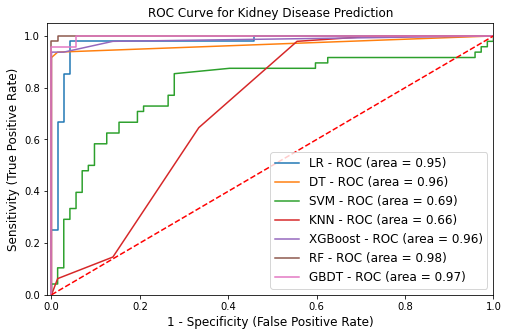

In [151]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': LR_AL,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': SVM_AL,
},
{
    'label': 'KNN',
    'model': KNN_AL,
},
{
    'label': 'XGBoost',
    'model': XGB_AL,
},
{
    'label': 'RF',
    'model': RD_AL,
},
{
    'label': 'GBDT',
    'model': GBC_AL,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC Curve for Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[95.0, 96.67, 74.17, 65.83, 96.67, 98.33, 97.5]
[94.78999999999999, 94.78999999999999, 69.44, 65.63, 95.83, 97.92, 96.88]


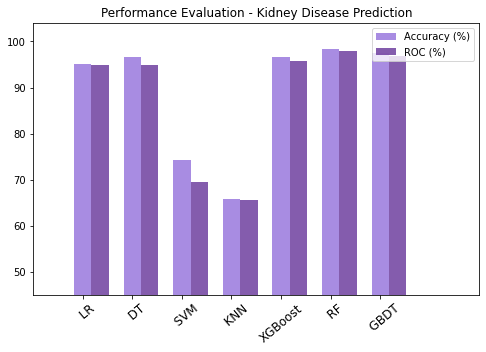

In [152]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': LR_AL,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': SVM_AL,
},
{
    'label': 'KNN',
    'model': KNN_AL,
},
{
    'label': 'XGBoost',
    'model': XGB_AL,
},
{
    'label': 'RF',
    'model': RD_AL,
},
{
    'label': 'GBDT',
    'model': GBC_AL,
}
]

means_roc = []
means_accuracy = [100*round(LR_ACC,4), 100*round(DT_acc,4), 100*round(SVM_ACCURACY,4), 100*round(KNN_ACCURACY,4), 100*round(XGB_acc,4), 
                  100*round(RD_AL_ACC,4), 100*round(GBC_ACCURACY,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()